# DSCI-352 Lab 06

Cassandra Man, USC ID #4731096972

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Reshape, Softmax, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from skimage.color import rgb2gray
from skimage import img_as_ubyte

## A. Download Dataset

In [2]:
# Download dataset from Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## B. Extract the Bird Class

In [3]:
# Find index for bird class
data_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
bird_index = data_classes.index("bird")

In [4]:
# This cell is to make and apply a mask to get training and test sets of only bird images

# Create a boolean mask that returns only bird samples
bird_only_train = [True if i == bird_index else False for i in y_train]
bird_only_test = [True if i == bird_index else False for i in y_test]

# Create datasets with only birds from train and test sets
x_train_bird = x_train[bird_only_train]
y_train_bird = y_train[bird_only_train]
x_test_bird = x_test[bird_only_test]
y_test_bird = y_test[bird_only_test]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


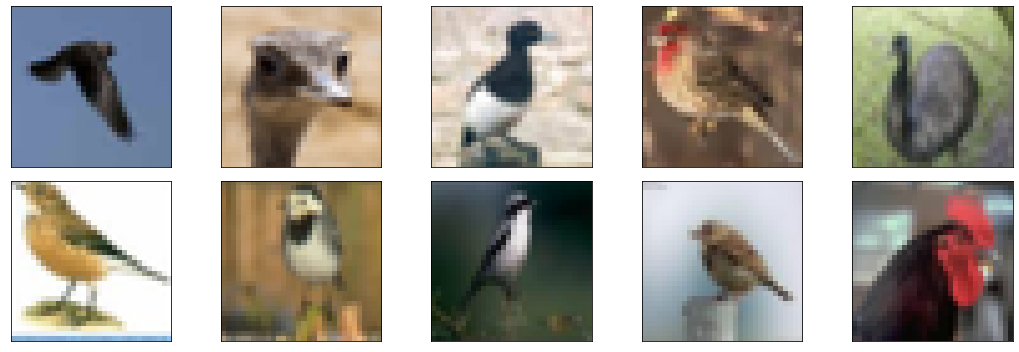

In [5]:
# This cell is to view original images of birds

# This creates the grid where each image is plotted, and specifies its size and layout
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15,5))

# For loop through axes
for i in axs.ravel():

  # Plots random images (Select int from 0 to 5000 with possibility of repetition, then take that index from x_train_bird)
  i.imshow(x_train_bird[np.random.choice(x_train_bird.shape[0])])

  # Gets rid of scale markers on axes
  i.set_xticks([],[])
  i.set_yticks([],[])

plt.tight_layout()

## C. Pixel Selection

In [6]:
# Assignment suggests selecting at least 10% of the pixels randomly
# Since it is strongly recommended to choose a large number, choose all pixels

## D. Convert into K-Color Images

In [7]:
# This cell runs k-means clustering with k = 4

# Fit
K_NUM = 4
k_means = KMeans(n_clusters=K_NUM)
k_means.fit(x_train_bird.reshape(-1,3))

# Predict the cluster of each pixel based on k_means
pred_train = k_means.predict(x_train_bird.reshape(-1,3))
pred_test = k_means.predict(x_test_bird.reshape(-1,3))

# Find centers of clusters to be the main colors
cluster_centers = k_means.cluster_centers_

In [8]:
# This cell converts colored images to k-colored images

# Convert each pixel value to closest main color by Euclidean distance
x_train_k4 = np.array([cluster_centers[pred_train[pixel]] for pixel in range(len(x_train_bird.reshape(-1,3)))], dtype=np.uint8)
x_test_k4 = np.array([cluster_centers[pred_test[pixel]] for pixel in range(len(x_test_bird.reshape(-1,3)))], dtype=np.uint8)

# Convert images back into 32 x 32 x 3 (3 rgb pixels) shape to visualize 
x_train_k4 = x_train_k4.reshape(-1, 32, 32, 3)
x_test_k4 = x_test_k4.reshape(-1, 32, 32, 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


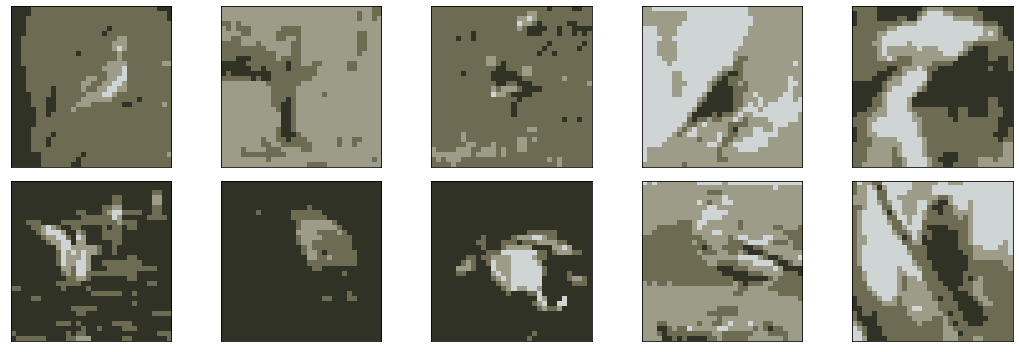

In [9]:
# This cell is to view k-color images of birds

# This creates the grid where each image is plotted, and specifies its size and layout
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15,5))

# For loop through axes
for i in axs.ravel():

  # Plots random images (Select int from 0 to 5000 with possibility of repetition, then take that index from x_train_k4)
  i.imshow(x_train_k4[np.random.choice(x_train_k4.shape[0])])

  # Gets rid of scale markers on axes
  i.set_xticks([],[])
  i.set_yticks([],[])

plt.tight_layout()

In [10]:
# Because centers of cluster are too close, in this cell we repeat with selected colors suggested in the assignment: Navy, Red, Mint, and White

# Create array of selected colors rgb avlues
select_colors = np.array([[0,0,128],[230,25,75],[170,255,195],[255,255,255]], dtype=np.uint8)

# Loop through each pixel and replace previous color with new selected color
x_train_color = np.array([select_colors[pred_train[pixel]] for pixel in range(len(x_train_bird.reshape(-1, 3)))], dtype=np.uint8)
x_test_color = np.array([select_colors[pred_test[pixel]] for pixel in range(len(x_test_bird.reshape(-1, 3)))], dtype=np.uint8)

# Convert images back into 32 x 32 x 3 (3 rgb pixels) shape to visualize 
x_train_color = x_train_color.reshape(-1, 32, 32, 3)
x_test_color = x_test_color.reshape(-1, 32, 32, 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


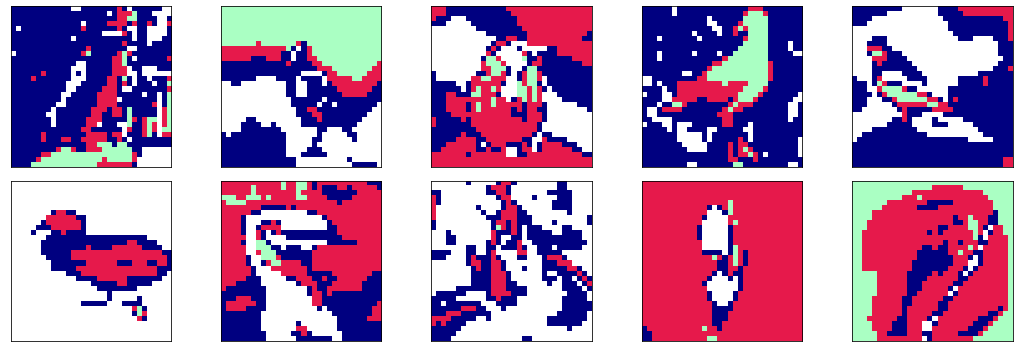

In [11]:
# This cell is to view new selected color images of birds

# This creates the grid where each image is plotted, and specifies its size and layout
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15,5))

# For loop through axes
for i in axs.ravel():

  # Plots random images (Select int from 0 to 5000 with possibility of repetition, then take that index from x_train_color)
  i.imshow(x_train_color[np.random.choice(x_train_color.shape[0])])

  # Gets rid of scale markers on axes
  i.set_xticks([],[])
  i.set_yticks([],[])

plt.tight_layout()

## E. Grayscale Images

In [12]:
# Use skikit-learrn to convert images to grayscale (reduce from 3 rgb values to 1)
x_train_grayscale = np.array([rgb2gray(x_train_bird[image]) for image in range(len(x_train_bird))])
x_test_grayscale = np.array([rgb2gray(x_test_bird[image]) for image in range(len(x_test_bird))])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


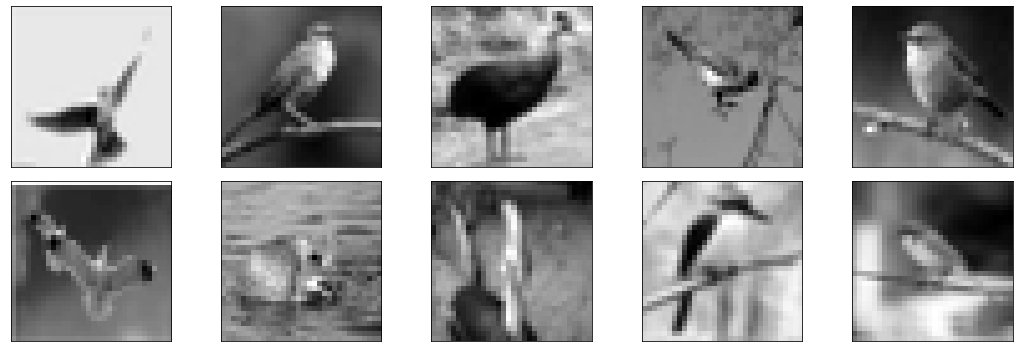

In [13]:
# This cell is to view grayscale images of birds

# This creates the grid where each image is plotted, and specifies its size and layout
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15,5))

# For loop through axes
for i in axs.ravel():

  # Plots random images (Select int from 0 to 5000 with possibility of repetition, then take that index from x_train_grayscale)
  i.imshow(x_train_grayscale[np.random.choice(x_train_grayscale.shape[0])], cmap="gray")

  # Gets rid of scale markers on axes
  i.set_xticks([],[])
  i.set_yticks([],[])

plt.tight_layout()

## F. Deep Convolutional Neural Network

In [14]:
# This cell creates classes for the 4 colors using one-hot encoding

# Use one-hot encoding for each of the 4 colors
oh_encode = OneHotEncoder()
pred_train_ohe = oh_encode.fit_transform(pred_train.reshape(-1, 1))
pred_test_ohe = oh_encode.fit_transform(pred_test.reshape(-1, 1))

# Reshape colored pixels

# Form an array of length of 32 x 32 x 4 colors
pred_train_ohe = pred_train_ohe.reshape(-1, 32*32*K_NUM).toarray().astype(int)
pred_test_ohe = pred_test_ohe.reshape(-1, 32*32*K_NUM).toarray().astype(int)

# Reshape into 32 x 32 x 4 format
pred_train_ohe = pred_train_ohe.reshape(-1, 32, 32, K_NUM)
pred_test_ohe = pred_test_ohe.reshape(-1, 32, 32, K_NUM)

k4_color_train = pred_train_ohe.copy()
k4_color_test = pred_test_ohe.copy()

In [15]:
# This cell is to format grayscale images to be the inputs

# Reshape grayscale images to be 32 X 32 X 1
x_train_grayscale = x_train_grayscale.reshape(-1, 32, 32, 1)
x_test_grayscale = x_test_grayscale.reshape(-1, 32, 32, 1)

# Convert grayscale to uint8
x_train_grayscale = img_as_ubyte(x_train_grayscale)
x_test_grayscale = img_as_ubyte(x_test_grayscale)

In [16]:
# This cell sets up CNN
model = Sequential()

# First convolution layer with 128 filters (5x5)
# Relu activation function is needed to determine the output of a neural network
model.add(Conv2D(128, kernel_size=5, activation="relu", input_shape=(32, 32, 1), padding="same"))
# Pooling necessary to reduce spatial size to neuron
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolution layer with 64 filters (5x5)
# Relu activation function is needed to determine the output of a neural network
model.add(Conv2D(64, kernel_size=5, activation="relu", padding="same"))
# Pooling necessary to reduce spatial size to neuron
model.add(MaxPool2D(pool_size=2, strides=2))

# Third convolution layer with 32 filters (5x5)
# Relu activation function is needed to determine the output of a neural network
model.add(Conv2D(32, kernel_size=5, activation="relu", padding="same"))
# Pooling necessary to reduce spatial size to neuron
model.add(MaxPool2D(pool_size=2, strides=2))

# Reshape matrix so that the last layer has 32 x 32 x 4 neurons for each pixel
model.add(Flatten())
model.add(Dense(32*32*K_NUM))
model.add(Reshape((32, 32, K_NUM)))

# Use softmax output layer to select highest value for each k class for each of 1024 pixels
model.add(Softmax())

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        204864    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [17]:
LOAD_TRAINED_WEIGHTS = False

if LOAD_TRAINED_WEIGHTS and os.path.exists("./checkpoints/model_k4.hdf5"):
  try:
    model.load_weights("./checkpoints/model_k4.hdf5")

    model.compile(optimizer=tf.keras.optimeizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()

    SUCCESSFUL_WEIGHT_LOAD = True
  
  except:
    SUCCESSFUL_WEIGHT_LOAD = False
    print("Could not load weights.")

else:
  SUCCESSFUL_WEIGHT_LOAD = False

In [18]:
# This cell is for training the model

EPOCHS = 30
BATCH_SIZE = 64
TRAIN_MODEL = True

if TRAIN_MODEL:
  # Create directory for model checkpoints
  BACKUP_DIR = "./checkpoints"
  if not os.path.exists(BACKUP_DIR):
    os.mkdir(BACKUP_DIR)

  # Create file to store checkpoint
  BACKUP_FILE = os.path.join(BACKUP_DIR, "model_k4.hdf5")

  # Callbacks are necessary to keep track of early stopping
  checkpoint = ModelCheckpoint(BACKUP_FILE, monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=0)
  # When loss stops changing, doesn't waste time and stops early
  plateauLRreduce = ReduceLROnPlateau(factor = 0.5, patience = 10, monitor="val_loss", min_lr = 0.0000001, verbose=1)
  stopearly = EarlyStopping(monitor="val_loss", patience=30, verbose=1)
  # Log stores information for future use
  logs = CSVLogger(filename="log_model_k4.csv", separator=",", append=(LOAD_TRAINED_WEIGHTS & SUCCESSFUL_WEIGHT_LOAD))
  callbacks = [checkpoint, plateauLRreduce, stopearly, logs]

  # Train model and save history
  model_history = model.fit(x_train_grayscale, k4_color_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=callbacks, verbose=1, shuffle=True)


Epoch 1/30
63/63 [==============================] - 3s 25ms/step - loss: 1.7703 - accuracy: 0.2961 - val_loss: 1.3120 - val_accuracy: 0.3699
Epoch 2/30
63/63 [==============================] - 1s 15ms/step - loss: 1.2621 - accuracy: 0.4070 - val_loss: 1.1633 - val_accuracy: 0.4653
Epoch 3/30
63/63 [==============================] - 1s 16ms/step - loss: 1.1421 - accuracy: 0.4703 - val_loss: 1.0895 - val_accuracy: 0.4990
Epoch 4/30
63/63 [==============================] - 1s 16ms/step - loss: 1.0681 - accuracy: 0.5091 - val_loss: 1.0307 - val_accuracy: 0.5219
Epoch 5/30
63/63 [==============================] - 1s 15ms/step - loss: 1.0080 - accuracy: 0.5357 - val_loss: 1.0083 - val_accuracy: 0.5265
Epoch 6/30
63/63 [==============================] - 1s 16ms/step - loss: 0.9815 - accuracy: 0.5513 - val_loss: 0.9804 - val_accuracy: 0.5478
Epoch 7/30
63/63 [==============================] - 1s 15ms/step - loss: 0.9592 - accuracy: 0.5611 - val_loss: 0.9561 - val_accuracy: 0.5633
Epoch 8/30
63

In [19]:
# This cell is for reporting train and test errors

log_model_k4 = pd.read_csv('log_model_k4.csv')

# Calculate train and test errors
train_error = model.evaluate(x_train_grayscale, k4_color_train, return_dict=True)
test_error = model.evaluate(x_test_grayscale, k4_color_test, return_dict=True)

print("Train")
print("Loss: " + str(train_error["loss"]))
print("Accuracy: " + str(train_error["accuracy"]))
print("Test")
print("Loss: " + str(test_error["loss"]))
print("Accuracy: " + str(test_error["accuracy"]))

32/32 [==============================] - 0s 5ms/step - loss: 1.0078 - accuracy: 0.5892
Train
Loss: 0.7476938962936401
Accuracy: 0.6779119372367859
Test
Loss: 1.0078463554382324
Accuracy: 0.5891953110694885


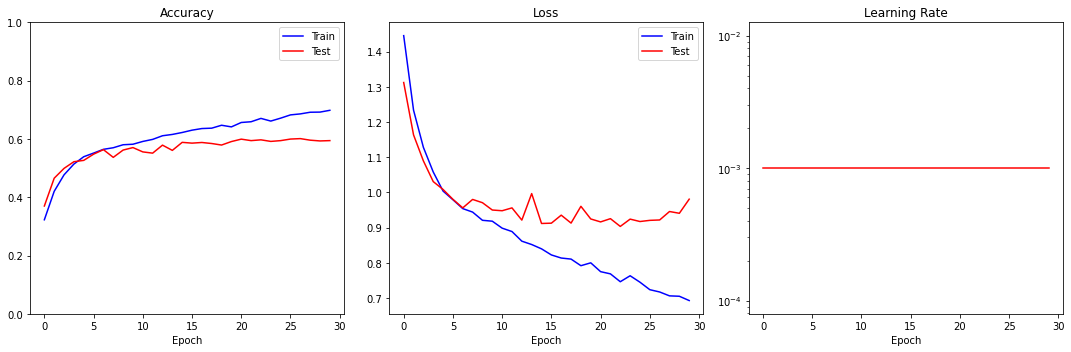

In [20]:
# This cell is for plotting the training and test errors in each epoch

# This creates the grid where each figure is plotted, and specifies its size and layout
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

# Plotting accuracy
fig.sca(axs[0])
plt.plot(log_model_k4.index, log_model_k4.accuracy, color="blue", label="Train")
plt.plot(log_model_k4.index, log_model_k4.val_accuracy, color="red", label="Test")
axs[0].set_ylim([0,1])
axs[0].title.set_text("Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].legend()

# Plotting loss
fig.sca(axs[1])
plt.plot(log_model_k4.index, log_model_k4.loss, color="blue", label="Train")
plt.plot(log_model_k4.index, log_model_k4.val_loss, color="red", label="Test")
axs[1].title.set_text("Loss")
axs[1].set_xlabel("Epoch")
axs[1].legend()

# Ploting learning Rate
fig.sca(axs[2])
axs[2].set_yscale("log")
plt.plot(log_model_k4.index, log_model_k4.lr, color="red")
axs[2].title.set_text("Learning Rate")
axs[2].set_xlabel("Epoch")

plt.tight_layout()

In [21]:
# This cell applies the model to predict the color class pixels in the test set

# Predict with model
pred_test_color = model.predict(x_test_grayscale)

# Matrix must be reshaped
pred_test_color = pred_test_color.reshape(-1, 4)

# Get the new selected color by looping through each color and finding the max value
color_test_images = []
for i in range(len(pred_test_color)):
  color_test_images.append([np.uint8(color) for color in select_colors[np.argmax(pred_test_color[i])]])

# Reshape so that output image will be 32 x 32 x 3
color_test_images = np.asarray(np.reshape(color_test_images, (-1, 32, 32, 3)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since 

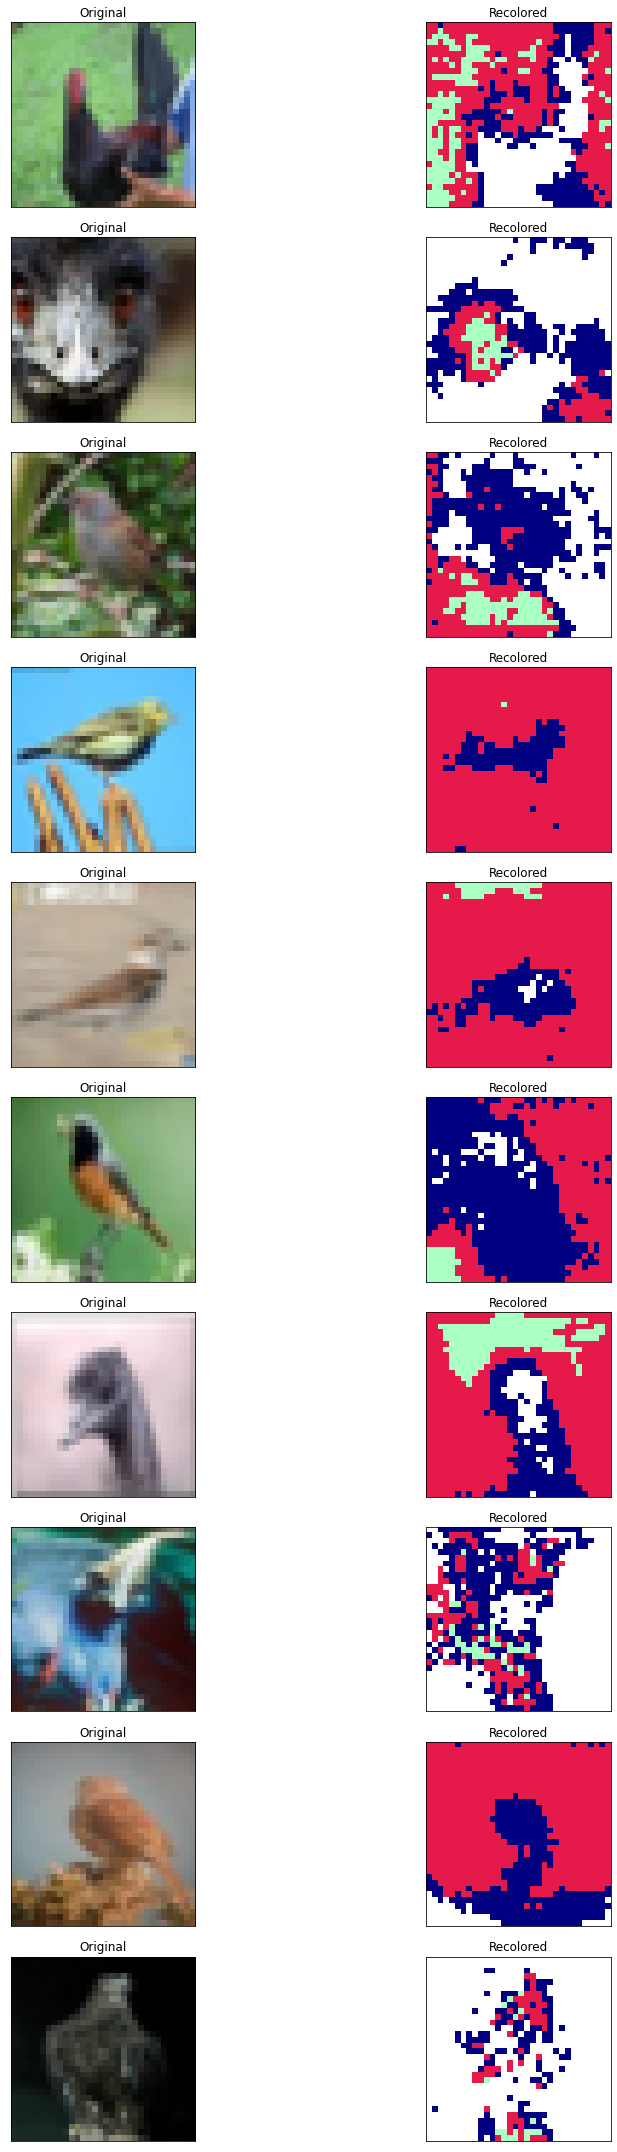

In [22]:
# This cell visualizes the first 10 images, comparing the original to the recolored version

# This creates the grid where each figure is plotted, and specifies its size and layout
img_total = 10
fig, axs = plt.subplots(ncols=2, nrows=img_total, figsize=(15, img_total*3))
img_count = 0

# Loop through axes and plot 10 images
for row in range(axs.shape[0]):
  img_index = img_count
  img_count +=1

  # Plot original image
  axs[row][0].imshow(x_test_bird[img_index])
  axs[row][0].set_xticks([],[])
  axs[row][0].set_yticks([],[])
  axs[row][0].set_title("Original")

  # Plot recolored image
  axs[row][1].imshow(color_test_images[img_index])
  axs[row][1].set_xticks([],[])
  axs[row][1].set_yticks([],[])
  axs[row][1].set_title("Recolored")

plt.tight_layout()

# Repeat with K = 16

## D. Convert into K-Color Images

In [23]:
# This cell runs k-means clustering with k = 16

# Fit
K_NUM = 16
k_means = KMeans(n_clusters=K_NUM)
k_means.fit(x_train_bird.reshape(-1,15))

# Predict the cluster of each pixel based on k_means
pred_train = k_means.predict(x_train_bird.reshape(-1,15))
pred_test = k_means.predict(x_test_bird.reshape(-1,15))

# Find centers of clusters to be the main colors
cluster_centers = k_means.cluster_centers_

In [24]:
# This cell converts colored images to k-colored images

# Convert each pixel value to closest main color by Euclidean distance
x_train_k16 = np.array([cluster_centers[pred_train[pixel]] for pixel in range(len(x_train_bird.reshape(-1,15)))], dtype=np.uint8)
x_test_k16 = np.array([cluster_centers[pred_test[pixel]] for pixel in range(len(x_test_bird.reshape(-1,15)))], dtype=np.uint8)

# Convert images back into 32 x 32 x 3 (3 rgb pixels) shape to visualize 
x_train_k16 = x_train_k16.reshape(-1, 32, 32, 3)
x_test_k16 = x_test_k16.reshape(-1, 32, 32, 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


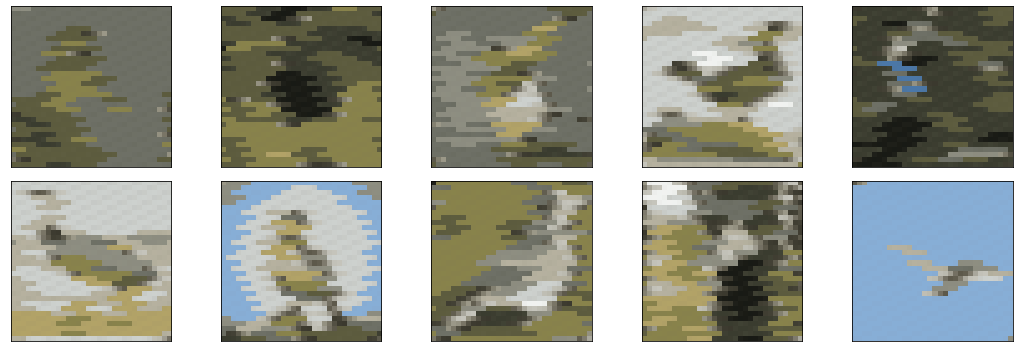

In [25]:
# This cell is to view k-color images of birds

# This creates the grid where each image is plotted, and specifies its size and layout
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15,5))

# For loop through axes
for i in axs.ravel():

  # Plots random images (Select int from 0 to 5000 with possibility of repetition, then take that index from x_train_k4)
  i.imshow(x_train_k16[np.random.choice(x_train_k16.shape[0])])

  # Gets rid of scale markers on axes
  i.set_xticks([],[])
  i.set_yticks([],[])

plt.tight_layout()

In [26]:
# Because centers of cluster are too close, in this cell we repeat with selected colors suggested in the assignment: Navy, Red, Mint, and White

# Create array of selected colors rgb avlues
select_colors = np.array([[0,0,128],[230,25,75],[170,255,195],[255,255,255], [153, 255, 51], [204, 102, 255], [0, 50, 100], [50, 0, 100], [100, 50, 0], [25, 50 ,75], [200, 0, 50], [70, 140, 30], [40, 50, 60], [100, 10, 75], [200, 10, 40], [150, 250, 10]], dtype=np.uint8)

# Loop through each pixel and replace previous color with new selected color
x_train_color = np.array([select_colors[pred_train[pixel]] for pixel in range(len(x_train_bird.reshape(-1, 15)))], dtype=np.uint8)
x_test_color = np.array([select_colors[pred_test[pixel]] for pixel in range(len(x_test_bird.reshape(-1, 15)))], dtype=np.uint8)

# Convert images back into 32 x 32 x 3 (3 rgb pixels) shape to visualize 
x_train_color = x_train_color.reshape(-1, 32, 32, 3)
x_test_color = x_test_color.reshape(-1, 32, 32, 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


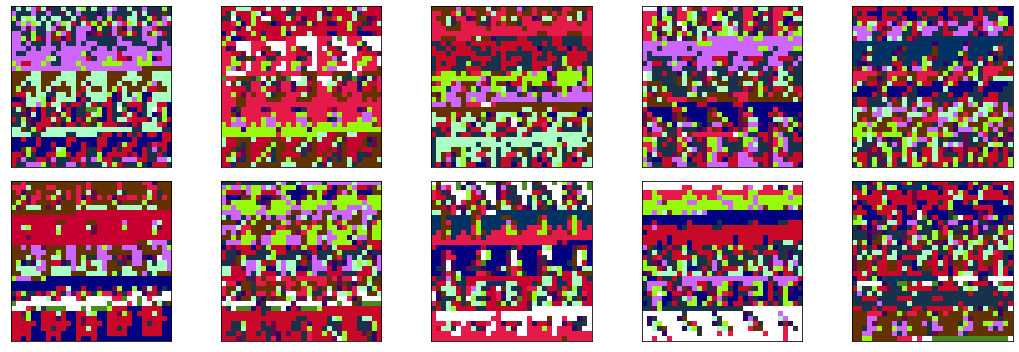

In [27]:
# This cell is to view new selected color images of birds

# This creates the grid where each image is plotted, and specifies its size and layout
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15,5))

# For loop through axes
for i in axs.ravel():

  # Plots random images (Select int from 0 to 5000 with possibility of repetition, then take that index from x_train_color)
  i.imshow(x_train_color[np.random.choice(x_train_color.shape[0])])

  # Gets rid of scale markers on axes
  i.set_xticks([],[])
  i.set_yticks([],[])

plt.tight_layout()

## E. Grayscale Images

In [28]:
# Use skikit-learrn to convert images to grayscale (reduce from 3 rgb values to 1)
x_train_grayscale16 = np.array([rgb2gray(x_train_bird[image]) for image in range(len(x_train_bird))])
x_test_grayscale16 = np.array([rgb2gray(x_test_bird[image]) for image in range(len(x_test_bird))])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


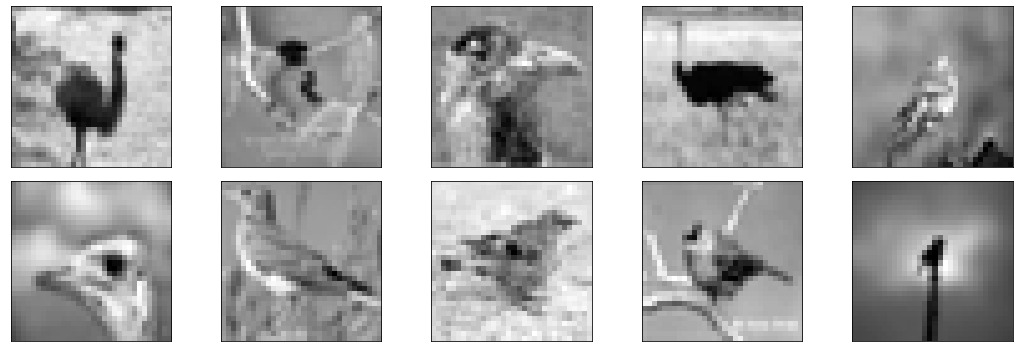

In [29]:
# This cell is to view grayscale images of birds

# This creates the grid where each image is plotted, and specifies its size and layout
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15,5))

# For loop through axes
for i in axs.ravel():

  # Plots random images (Select int from 0 to 5000 with possibility of repetition, then take that index from x_train_grayscale16)
  i.imshow(x_train_grayscale16[np.random.choice(x_train_grayscale16.shape[0])], cmap="gray")

  # Gets rid of scale markers on axes
  i.set_xticks([],[])
  i.set_yticks([],[])

plt.tight_layout()

## F. Deep Convolutional Neural Network

In [30]:
# This cell creates classes for the 16 colors using one-hot encoding

# Use one-hot encoding for each of the 16 colors
oh_encode = OneHotEncoder()
pred_train_ohe = oh_encode.fit_transform(pred_train.reshape(-1, 1))
pred_test_ohe = oh_encode.fit_transform(pred_test.reshape(-1, 1))

# Reshape colored pixels

# Form an array of length of 32 x 32 x 16 colors
pred_train_ohe = pred_train_ohe.reshape(-1, 32*32*K_NUM).toarray().astype(int)
pred_test_ohe = pred_test_ohe.reshape(-1, 32*32*K_NUM).toarray().astype(int)

# Reshape into 32 x 32 x 16 format
pred_train_ohe = pred_train_ohe.reshape(-1, 32, 32, K_NUM)
pred_test_ohe = pred_test_ohe.reshape(-1, 32, 32, K_NUM)

k16_color_train = pred_train_ohe.copy()
k16_color_test = pred_test_ohe.copy()

In [31]:
# This cell is to format grayscale images to be the inputs

# Reshape grayscale images to be 32 X 32 X 1
x_train_grayscale16 = x_train_grayscale16.reshape(-1, 32, 32, 1)
x_test_grayscale16 = x_test_grayscale16.reshape(-1, 32, 32, 1)

# Convert grayscale to uint8
x_train_grayscale16 = img_as_ubyte(x_train_grayscale16)
x_test_grayscale16 = img_as_ubyte(x_test_grayscale16)

In [32]:
# This cell sets up CNN
model = Sequential()

# First convolution layer with 128 filters (5x5)
# Relu activation function is needed to determine the output of a neural network
model.add(Conv2D(128, kernel_size=5, activation="relu", input_shape=(32, 32, 1), padding="same"))
# Pooling necessary to reduce spatial size to neuron
model.add(MaxPool2D(pool_size=2, strides=2))

# Second convolution layer with 64 filters (5x5)
# Relu activation function is needed to determine the output of a neural network
model.add(Conv2D(64, kernel_size=5, activation="relu", padding="same"))
# Pooling necessary to reduce spatial size to neuron
model.add(MaxPool2D(pool_size=2, strides=2))

# Third convolution layer with 32 filters (5x5)
# Relu activation function is needed to determine the output of a neural network
model.add(Conv2D(32, kernel_size=5, activation="relu", padding="same"))
# Pooling necessary to reduce spatial size to neuron
model.add(MaxPool2D(pool_size=2, strides=2))

# Reshape matrix so that the last layer has 32 x 32 x 4 neurons for each pixel
model.add(Flatten())
model.add(Dense(32*32*K_NUM))
model.add(Reshape((32, 32, K_NUM)))

# Use softmax output layer to select highest value for each k class for each of 1024 pixels
model.add(Softmax())

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 128)       3328      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        204864    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [33]:
LOAD_TRAINED_WEIGHTS = False

if LOAD_TRAINED_WEIGHTS and os.path.exists("./checkpoints/model_k16.hdf5"):
  try:
    model.load_weights("./checkpoints/model_k16.hdf5")

    model.compile(optimizer=tf.keras.optimeizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

    model.summary()

    SUCCESSFUL_WEIGHT_LOAD = True
  
  except:
    SUCCESSFUL_WEIGHT_LOAD = False
    print("Could not load weights.")

else:
  SUCCESSFUL_WEIGHT_LOAD = False

In [34]:
# This cell is for training the model

EPOCHS = 30
BATCH_SIZE = 64
TRAIN_MODEL = True

if TRAIN_MODEL:
  # Create directory for model checkpoints
  BACKUP_DIR = "./checkpoints"
  if not os.path.exists(BACKUP_DIR):
    os.mkdir(BACKUP_DIR)

  # Create file to store checkpoint
  BACKUP_FILE = os.path.join(BACKUP_DIR, "model_k16.hdf5")

  # Callbacks are necessary to keep track of early stopping
  checkpoint = ModelCheckpoint(BACKUP_FILE, monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=0)
  # When loss stops changing, doesn't waste time and stops early
  plateauLRreduce = ReduceLROnPlateau(factor = 0.5, patience = 10, monitor="val_loss", min_lr = 0.0000001, verbose=1)
  stopearly = EarlyStopping(monitor="val_loss", patience=30, verbose=1)
  # Log stores information for future use
  logs = CSVLogger(filename="log_model_k16.csv", separator=",", append=(LOAD_TRAINED_WEIGHTS & SUCCESSFUL_WEIGHT_LOAD))
  callbacks = [checkpoint, plateauLRreduce, stopearly, logs]

  # Train model and save history

  
  # Running into error here due to arrays not containing the same number of samples, traced error back to creating k16_color_train having less than 5000 for shape, but unsure which step is incorrect
  model_history = model.fit(x_train_grayscale16, k16_color_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=callbacks, verbose=1, shuffle=True)


ValueError: ignored

In [ ]:
# This cell is for reporting train and test errors

log_model_k4 = pd.read_csv('log_model_k16.csv')

# Calculate train and test errors
train_error = model.evaluate(x_train_grayscale16, k16_color_train, return_dict=True)
test_error = model.evaluate(x_test_grayscale16, k16_color_test, return_dict=True)

print("Train")
print("Loss: " + str(train_error["loss"]))
print("Accuracy: " + str(train_error["accuracy"]))
print("Test")
print("Loss: " + str(test_error["loss"]))
print("Accuracy: " + str(test_error["accuracy"]))

In [ ]:
# This cell is for plotting the training and test errors in each epoch

# This creates the grid where each figure is plotted, and specifies its size and layout
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

# Plotting accuracy
fig.sca(axs[0])
plt.plot(log_model_k16.index, log_model_k16.accuracy, color="blue", label="Train")
plt.plot(log_model_k16.index, log_model_k16.val_accuracy, color="red", label="Test")
axs[0].set_ylim([0,1])
axs[0].title.set_text("Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].legend()

# Plotting loss
fig.sca(axs[1])
plt.plot(log_model_k16.index, log_model_k4.loss, color="blue", label="Train")
plt.plot(log_model_k16.index, log_model_k4.val_loss, color="red", label="Test")
axs[1].title.set_text("Loss")
axs[1].set_xlabel("Epoch")
axs[1].legend()

# Ploting learning Rate
fig.sca(axs[2])
axs[2].set_yscale("log")
plt.plot(log_model_k16.index, log_model_k4.lr, color="red")
axs[2].title.set_text("Learning Rate")
axs[2].set_xlabel("Epoch")

plt.tight_layout()

In [ ]:
# This cell applies the model to predict the color class pixels in the test set

# Predict with model
pred_test_color = model.predict(x_test_grayscale16)

# Matrix must be reshaped
pred_test_color = pred_test_color.reshape(-1, 16)

# Get the new selected color by looping through each color and finding the max value
color_test_images = []
for i in range(len(pred_test_color)):
  color_test_images.append([np.uint8(color) for color in select_colors[np.argmax(pred_test_color[i])]])

# Reshape so that output image will be 32 x 32 x 3
color_test_images = np.asarray(np.reshape(color_test_images, (-1, 32, 32, 3)))

In [ ]:
# This cell visualizes the first 10 images, comparing the original to the recolored version

# This creates the grid where each figure is plotted, and specifies its size and layout
img_total = 10
fig, axs = plt.subplots(ncols=2, nrows=img_total, figsize=(15, img_total*3))
img_count = 0

# Loop through axes and plot 10 images
for row in range(axs.shape[0]):
  img_index = img_count
  img_count +=1

  # Plot original image
  axs[row][0].imshow(x_test_bird[img_index])
  axs[row][0].set_xticks([],[])
  axs[row][0].set_yticks([],[])
  axs[row][0].set_title("Original")

  # Plot recolored image
  axs[row][1].imshow(color_test_images[img_index])
  axs[row][1].set_xticks([],[])
  axs[row][1].set_yticks([],[])
  axs[row][1].set_title("Recolored")

plt.tight_layout()